# Unsupervised Machine Learning - Clustering using K-means
k-means clustering is an unserpervised learning technique that is suitable for working with unlabelled data that lacks predefined categories or groups. The primary objectives of this algorithm is to group similar data points together with the number of groups determined by the value of k. the algorithm follows an iterative approach and assigns each data point to one of the k groups based on the features that are provided.  

In [1]:
# Import the libraries

# Data Analysis libraries
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning and evaluation metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Dataset
data = pd.read_csv("Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

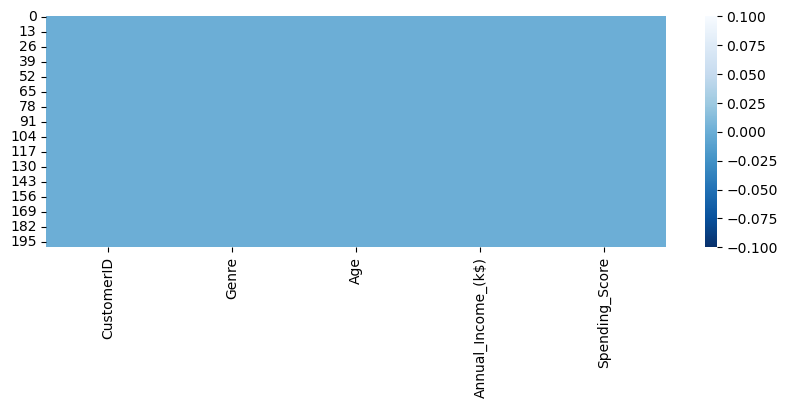

In [8]:
# Check for missing values
print(data.isnull().sum())

# Visualizing the missing data
plt.figure(figsize = (10, 3))
sns.heatmap(data.isnull(), cbar=True, cmap='Blues_r')

#### There is no missing values 

## DAta Cleaning and Pre-processing

In [9]:
# Check for duplicates
print(data.duplicated().sum())

0


### Exploratory DAta Analysis

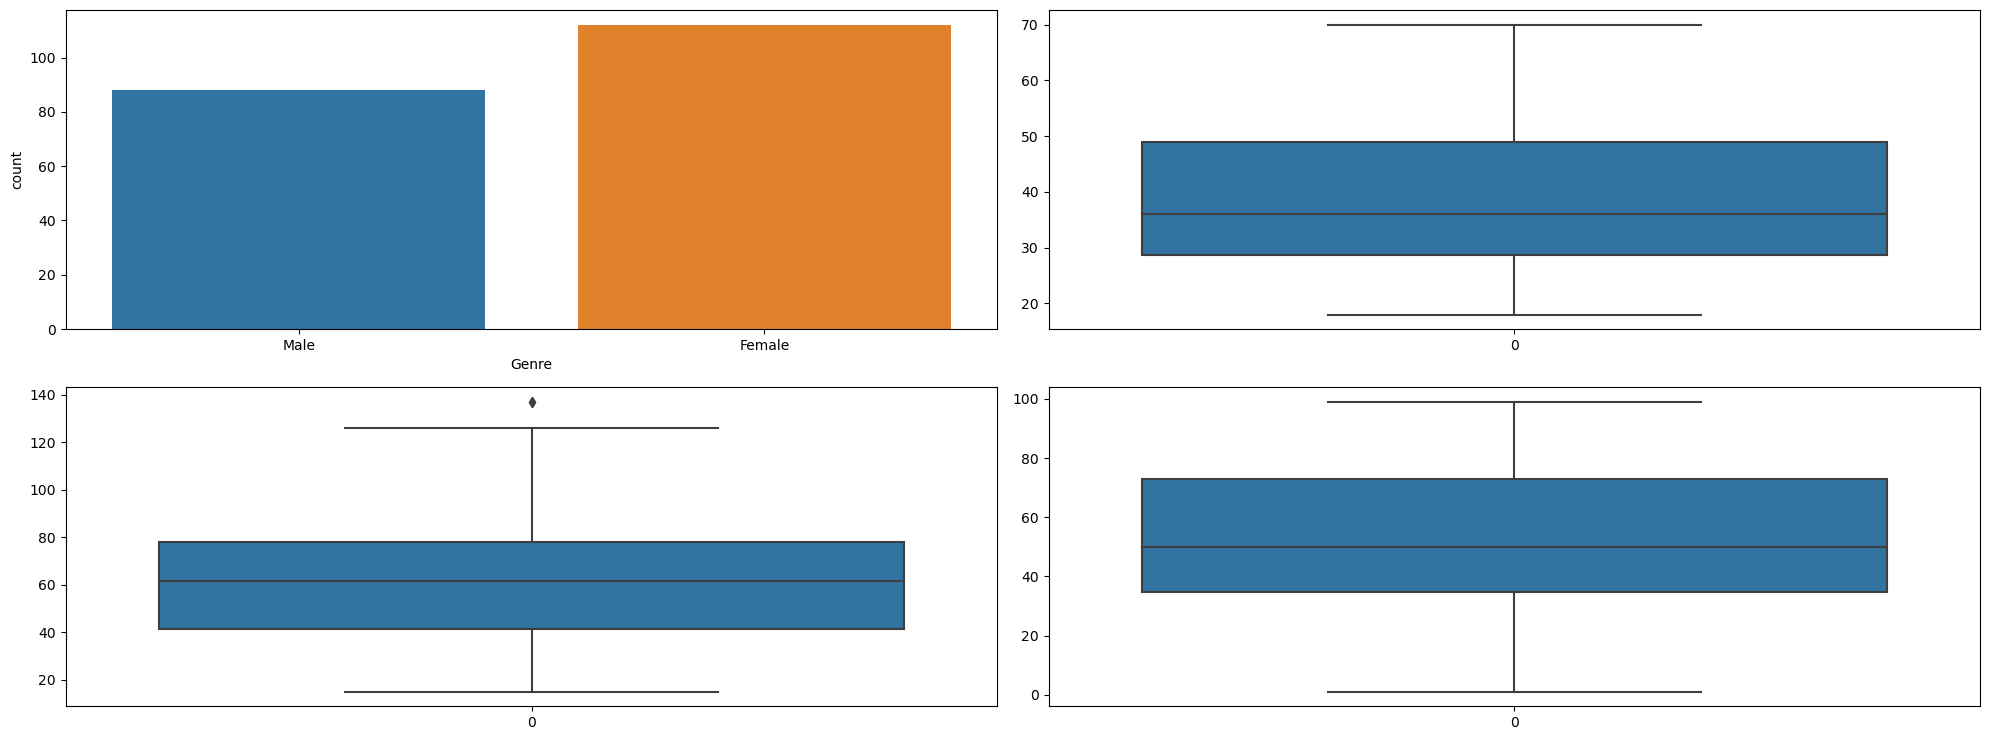

In [13]:
fig, axs = plt.subplots(2,2, figsize = (20, 7.5))
plt1 = sns.countplot(x=data['Genre'], ax = axs[0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

Always put narration

In [14]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
# To change categorical variable to numerical variable We use "LabelEncoder"
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder()  # method initialization

# Looping for columns except surviced
for c in data.columns[1:]:
    if(data[c].dtype=='object'):
        data[c]=encoder.fit_transform(data[c])
    else:
            data[c]=data[c]
            
data.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [21]:
# Remove Customer ID column
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


After applying the K-means clustering algorithm, we can determine the optimal number of clusters by using the Elbow Method. This method involves plotting the within Cluster Sum of Squares (wcss) against the number of clusters (K) and selecting the value of K where the rate of decrease in WCSS slows down significantly. In the graph below, we can observe that after K-3, there is no significant decrease in wcss, indicating that 3 is the optimal number of clusters in this case. Although the optimal value of K may not always be apparent from the graph, with practice, it becomes easier to identify the elbow point where the rate of decrease in WCSS slows down significantly.

![Alt text](https://i.imgur.com/gi9p7V5.png)


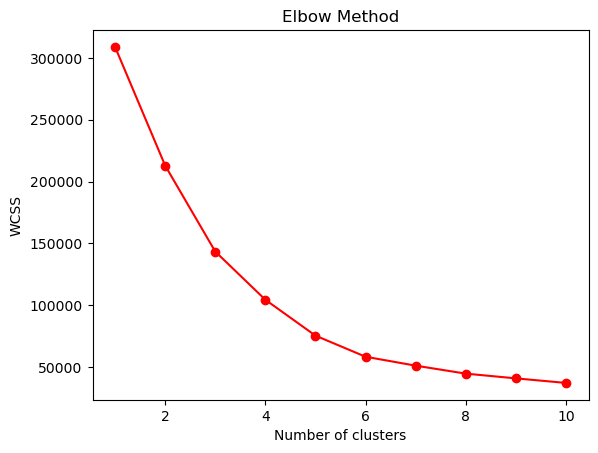

In [31]:
# Determine the optimal number of cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In this code block, the objective is to determine the optimal number of clusters for the K-means clustering algorithm. The optimal number of clusters is important because it affects the quality of the clustering results.

The within-cluster sum of squares (WCSS) is used to determine the optimal number of clusters. WCSS measures the sum of the squared distance between each point and its corresponding cluster centroid. The idea is to minimize the WCSS by increasing the number of clusters until a certain point where the WOSS starts to decrease at a slower rate.

The for loop iterates over a range of values from 1 to 10, creating a KMeans clustering model for each value of i. The 'init' parameter is set to 'k-means++* which is a method to initialize the centroids in a smart way to speed up convergence. The 'random_ state' parameter is set to 42 for reproducibility. The 'fit' method is used to fit the Means model to the data, and the inertia (WCSS) is computed and appended to the 'wess'list.

Finally, a plot is created with the number of clusters on the x-axis and the WCSS on the y-axis. The plot is called the 'Elbow Method' plot because it looks like an elbow where the optimal number of clusters is the point where the WCSS starts to decrease at a slower rate. in this case, the plot shows that the optimal number of clusters is 5, as the WCSS starts to decrease at a slower rate beyond that point.

In [32]:
# fit k-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

# Add cluster labels to data
data['cluster'] = kmeans.labels_

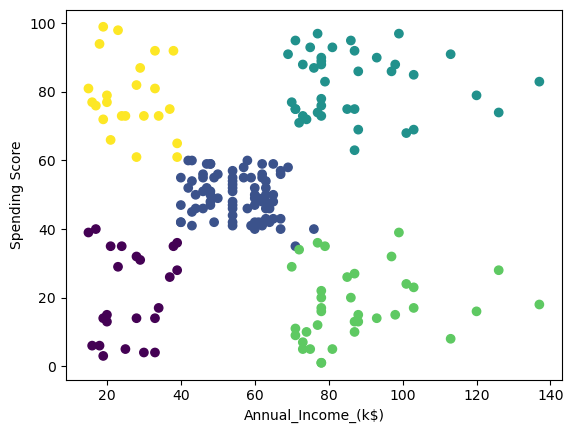

0.44473703994455477

In [34]:
# Visualize cluster results
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['cluster'], label='centroids')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending Score')
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)